In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dataset_phishing.csv')

In [3]:
from pandas_profiling import ProfileReport

C:\Users\juanc\AppData\Local\Temp\ipykernel_13716\2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
joined_columns = ["ip","nb_qm","ratio_digits_url","ratio_digits_host","shortest_word_host","longest_word_path","phish_hints","google_index"]
#joined_columns = ["ip","nb_qm","ratio_digits_url","ratio_digits_host","length_words_raw","shortest_word_host","longest_words_raw","longest_word_path","avg_word_host","avg_word_path","phish_hints","google_index"]

joined_columns.append('status')
df = df[joined_columns]
le = LabelEncoder()
df["status"] = le.fit_transform(df["status"])


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
X2 = df.iloc[:, 1:-1].values
y2 = df.iloc[:, -1].values
X2_entreno, X2_prueba, y2_entreno, y2_prueba = train_test_split(X2, y2, test_size = 0.25, random_state = 0)
clasificador = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clasificador.fit(X2_entreno, y2_entreno)
y2_pred = clasificador.predict(X2_prueba)
mat2_conf = confusion_matrix(y2_prueba, y2_pred)
print(mat2_conf)
accuracy_score(y2_prueba, y2_pred)

[[1296  134]
 [ 176 1252]]


0.8915325402379286

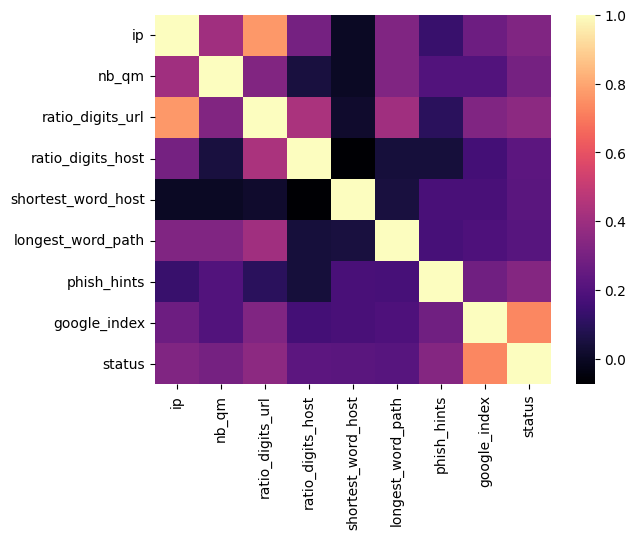

<Figure size 400x300 with 0 Axes>

In [6]:
corr_matrix = df.corr()
# Generar mapa de calor
sns.heatmap(corr_matrix, cmap='magma')

# Ajustar tamaño de figura
plt.figure(figsize=(4, 3))

# Mostrar gráfico
plt.show()
